# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipys


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&units=metric&q={city}'
    # print(city_url)
    city_response = requests.get(city_url)
    print(city_response)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
<Response [200]>
Processing Record 1 of Set 1 | hawaiian paradise park
<Response [200]>
Processing Record 2 of Set 1 | belmonte
<Response [200]>
Processing Record 3 of Set 1 | puerto ayora
<Response [200]>
Processing Record 4 of Set 1 | san luis de la loma
<Response [404]>
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
<Response [200]>
Processing Record 6 of Set 1 | anzio
<Response [200]>
Processing Record 7 of Set 1 | yellowknife
<Response [200]>
Processing Record 8 of Set 1 | bodaybo
<Response [200]>
Processing Record 9 of Set 1 | polyarnyy
<Response [200]>
Processing Record 10 of Set 1 | enewetak
<Response [200]>
Processing Record 11 of Set 1 | tiksi
<Response [200]>
Processing Record 12 of Set 1 | samalut
<Response [200]>
Processing Record 13 of Set 1 | crane
<Response [200]>
Processing Record 14 of Set 1 | edinburgh of the seven seas
<Response [200]>
Processing Record 15 of Set 1 | greymouth
<Response 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()
print(city_data_df)

                       City      Lat       Lng  Max Temp  Humidity  \
0    hawaiian paradise park  19.5933 -154.9731     27.15        79   
1                  belmonte -15.8631  -38.8828     22.95        85   
2              puerto ayora  -0.7393  -90.3518     21.97        95   
3       san luis de la loma  17.2706 -100.8939     27.35        82   
4                     anzio  41.4853   12.6179     20.25        78   
..                      ...      ...       ...       ...       ...   
573               nantucket  41.2835  -70.0995     23.34       100   
574        praia da vitoria  38.7333  -27.0667     22.14        83   
575                belgrade  44.8040   20.4651     22.81        78   
576              villanueva  15.3167  -88.0000     30.55        70   
577              deniliquin -35.5333  144.9667     10.81        59   

     Cloudiness  Wind Speed Country        Date  
0           100        4.12      US  1719189071  
1            28        2.66      BR  1719189071  
2        

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.5933,-154.9731,27.15,79,100,4.12,US,1719189071
1,belmonte,-15.8631,-38.8828,22.95,85,28,2.66,BR,1719189071
2,puerto ayora,-0.7393,-90.3518,21.97,95,53,0.89,EC,1719189071
3,san luis de la loma,17.2706,-100.8939,27.35,82,100,1.59,MX,1719189072
4,anzio,41.4853,12.6179,20.25,78,53,2.21,IT,1719189072


In [7]:
# Export the City_Data into a csv
output_dir = 'output_file'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

output_data = os.path.join(output_dir, "cities.csv")
city_data_df.to_csv(output_data, index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv(output_data, index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,27.15,79,100,4.12,US,1719189071
1,belmonte,-15.8631,-38.8828,22.95,85,28,2.66,BR,1719189071
2,puerto ayora,-0.7393,-90.3518,21.97,95,53,0.89,EC,1719189071
3,san luis de la loma,17.2706,-100.8939,27.35,82,100,1.59,MX,1719189072
4,anzio,41.4853,12.6179,20.25,78,53,2.21,IT,1719189072


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

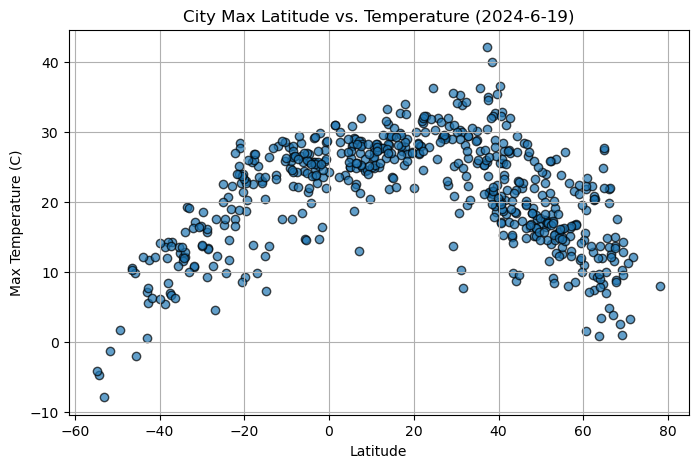

In [77]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8,5))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black', alpha=0.70)
plt.title("City Max Latitude vs. Temperature (2024-6-19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
output_dir = "output_file"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
output_data = os.path.join(output_dir, "Fig1.png")

plt.savefig(output_data)

#Show plot
plt.show()

#### Latitude Vs. Humidity

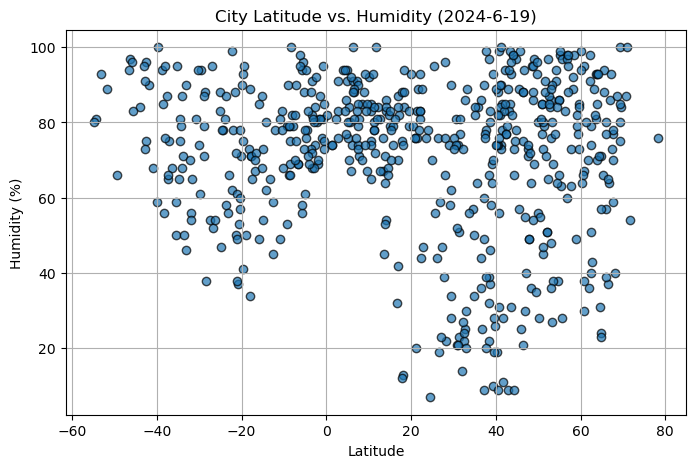

In [78]:
# Build scatter plot for latitude vs. humidity
plt.figure(figsize=(8,5))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black', alpha=0.70)
plt.title("City Latitude vs. Humidity (2024-6-19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
output_dir = "output_file"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
output_data = os.path.join(output_dir, "Fig2.png")

plt.savefig(output_data)

#Show plot
plt.show()

#### Latitude Vs. Cloudiness

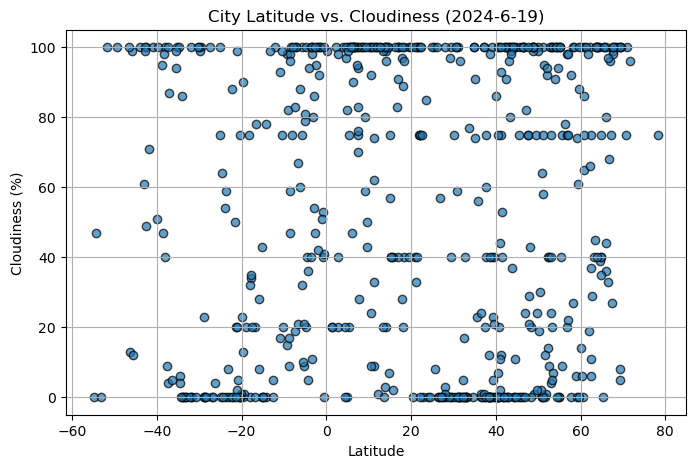

In [79]:
# Build scatter plot for latitude vs. cloudiness
plt.figure(figsize=(8,5))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black', alpha=0.70)
plt.title("City Latitude vs. Cloudiness (2024-6-19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
output_dir = "output_file"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
output_data = os.path.join(output_dir, "Fig3.png")

plt.savefig(output_data)

#Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

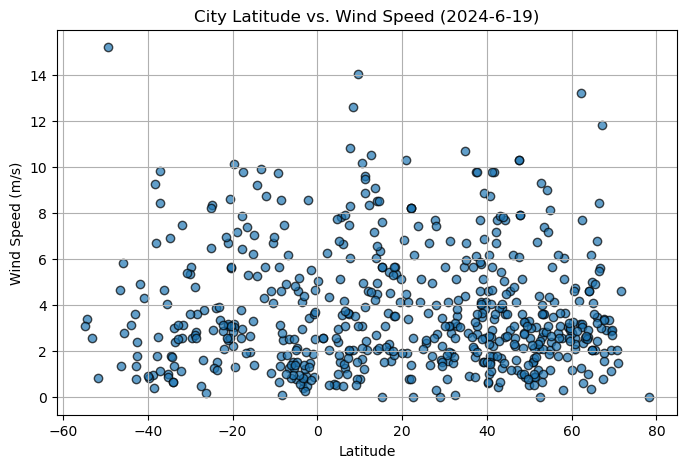

In [80]:
# Build scatter plot for latitude vs. wind speed
plt.figure(figsize=(8,5))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black', alpha=0.70)
plt.title("City Latitude vs. Wind Speed (2024-6-19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
output_dir = "output_file"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
output_data = os.path.join(output_dir, "Fig4.png")

plt.savefig(output_data)

#Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [57]:
# Define a function to create Linear Regression plots
def plot_linear_regression(df, x_col, y_col, x_label, y_label):
  
  # Extract the x and y data
    x = df[x_col]
    y = df[y_col]

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # print regression stats
    print(f'r-value: {r_value}')
    print(f'p_value: {p_value}')
    print(f'std-error: {std_err}')

    # Create the scatter plot
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, alpha=0.5, edgecolors='black', label='Data Points')
    
    # Plot the regression line
    plt.plot(x, slope * x + intercept, color='red', label=f'Linear Regression\n$y={slope:.2f}x+{intercept:.2f}$\n$r^2={r_value**2:.2f}$')
    
    # Add labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.text(min(x), max(y), f'$y = {slope:.2f}x + {intercept:.2f}$', color='red', fontsize=15)
    # Show plot
    plt.show()



In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

#Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,27.15,79,100,4.12,US,1719189071
3,san luis de la loma,17.2706,-100.8939,27.35,82,100,1.59,MX,1719189072
4,anzio,41.4853,12.6179,20.25,78,53,2.21,IT,1719189072
5,yellowknife,62.4560,-114.3525,20.29,51,75,7.72,CA,1719189073
6,bodaybo,57.8506,114.1933,21.51,73,92,0.31,RU,1719189073


In [76]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,belmonte,-15.8631,-38.8828,22.95,85,28,2.66,BR,1719189071
2,puerto ayora,-0.7393,-90.3518,21.97,95,53,0.89,EC,1719189071
12,edinburgh of the seven seas,-37.0676,-12.3116,14.22,75,87,9.85,SH,1719189074
13,greymouth,-42.4667,171.2000,11.71,75,100,2.41,NZ,1719189075
14,carnarvon,-24.8667,113.6333,16.72,47,0,8.35,AU,1719189075


###  Temperature vs. Latitude Linear Regression Plot

r-value: -0.6618347024030008
p_value: 3.9464499301098416e-52
std-error: 0.014385538240456795


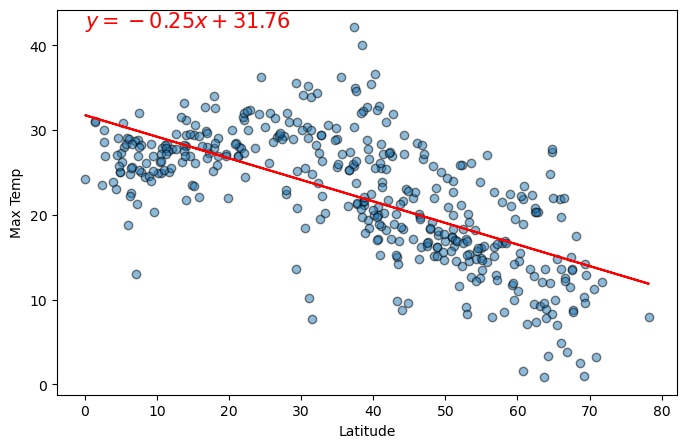

In [68]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Max Temp', 'Latitude', 'Max Temp')

r-value: 0.8134733245879252
p_value: 1.4157776201581189e-42
std-error: 0.025011793085862533


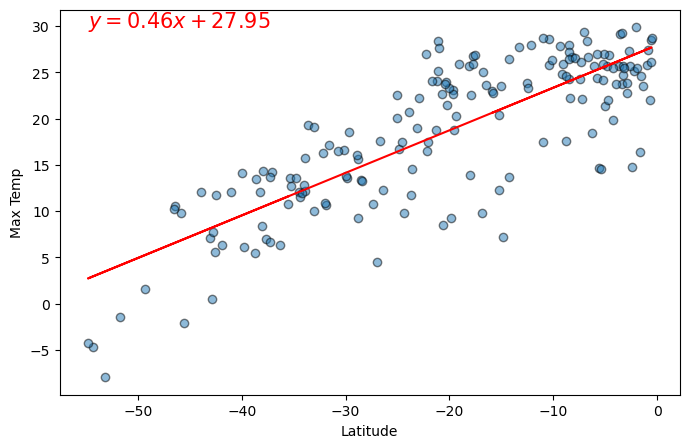

In [69]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Max Temp', 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** 
The scatter plots display the relationship between latitude and maximum temperature for the Northern and Southern Hemispheres. 

The Northern Hemisphere has a negative slope of -0.25, conveying that as the cities are located further away from the equator, the maximum temperature is more likely to decrease as it is much colder than those closer to the equator. The r-value of -0.6618 indicates a negative correlation between latitude and maximum temperature; the temperature tends to decrease as latitude increases. Moreover, the p-value is smaller than 0.05, making the relationship statistically significant.

The Southern Hemisphere has a positive slope of 0.46, signifying that the maximum temperature increases as the cities move closer to the equator.  The r-value of 0.8135 indicates a positive correlation between latitude and maximum temperature; the temperature is more likely to increase as latitude decreases. Lastly, the p-value is lower than 0.05. Therefore, the relationship is statistically significant. 

### Humidity vs. Latitude Linear Regression Plot

r-value: -0.05872322676740418
p_value: 0.2395093488122482
std-error: 0.059041903910413314


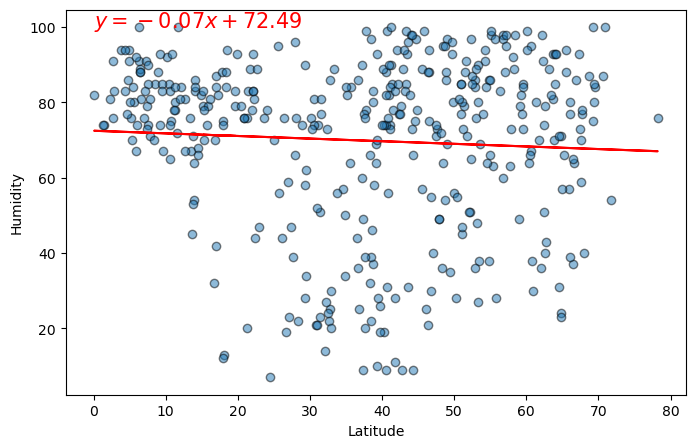

In [70]:
plot_linear_regression(northern_hemi_df, 'Lat', 'Humidity', 'Latitude', 'Humidity')

r-value: -0.031625592237876796
p_value: 0.6777956669085072
std-error: 0.07947215736463646


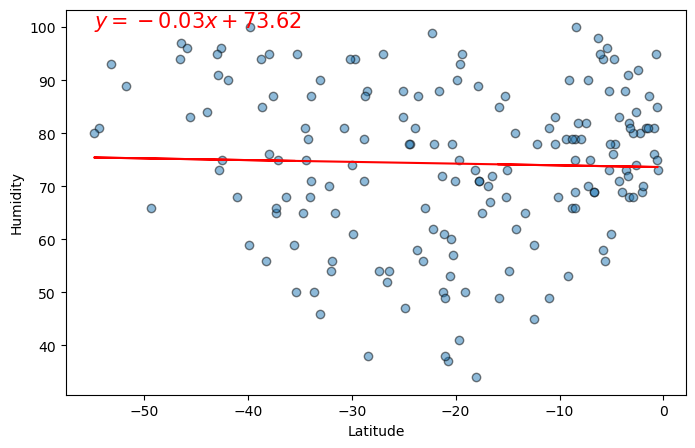

In [71]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Humidity', 'Latitude', 'Humidity')

**Discussion about the linear relationship:** 
The scatter plots analyze the relationship between latitude and humidity for the Nothern and Southern Hemisphere.

The Northern Hemisphere has a slope of -0.07, which illustrates a negative correlation between latitude and humidity. The red line shows a weak correlation between both variables; latitude does not determine the humidity level in the northern regions. 

The Southern Hemisphere has a slope of -0.03, which is slightly larger than the Northern Hemisphere's, but it is a negative relationship. Similar to the Northern Hemisphere, the linear relationship is weak. 

Although the data points cannot predict humidity levels according to latitude, other variables may have a positive impact. 

### Cloudiness vs. Latitude Linear Regression Plot

r-value: -0.055735123467746985
p_value: 0.26430776135663314
std-error: 0.10666563634558045


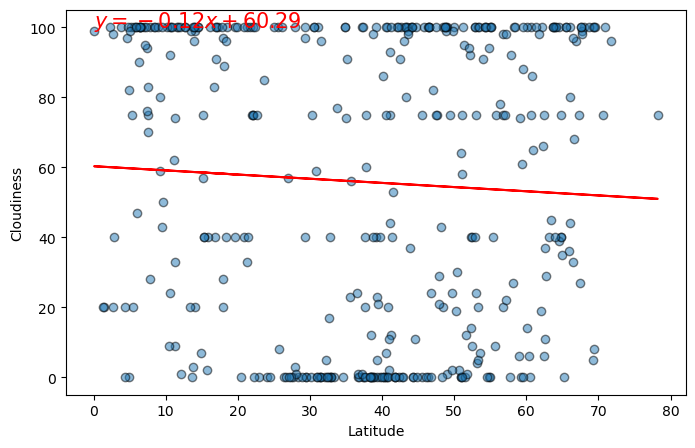

In [72]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Cloudiness', 'Latitude', 'Cloudiness')

r-value: 0.07975284442399215
p_value: 0.2941126281309012
std-error: 0.21845232726533023


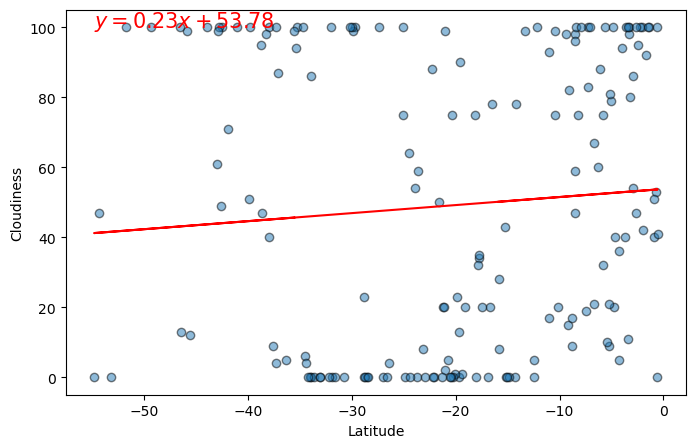

In [73]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Cloudiness', 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** 

The Northern Hemisphere has a negative slope of -0.12, illustrating a negative correlation between latitude and cloudiness. On the other hand, the Southern Hemisphere has a slope of 0.23, showing a positive correlation between both variables. Both slopes are close to 0, indicating that latitude slightly influences cloudiness. 
Both hemispheres have a weak linear relationship, signifying that regions away or closer to the equator may have the same level of cloudiness.  

### Wind Speed vs. Latitude Linear Regression Plot

r-value: -0.1339596049919694
p_value: 0.0070809051371030565
std-error: 0.006546332039611216


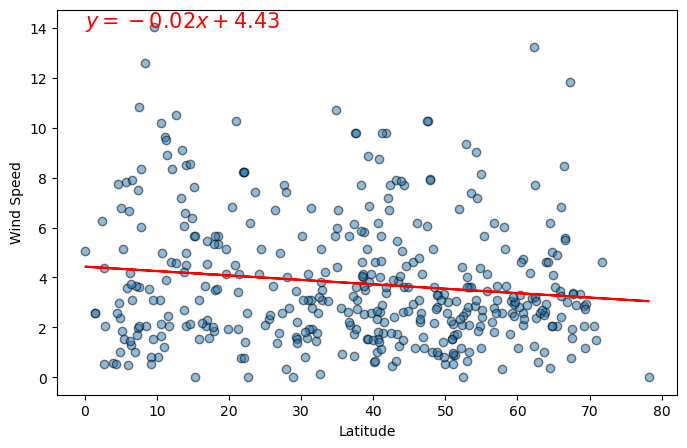

In [74]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Wind Speed', 'Latitude', 'Wind Speed')

r-value: 0.07975284442399215
p_value: 0.2941126281309012
std-error: 0.21845232726533023


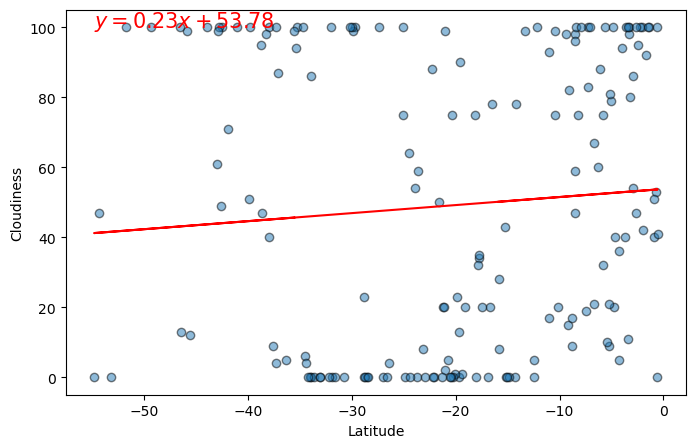

In [75]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Cloudiness', 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** 

The Northern Hemisphere has a slope of -0.02, demonstrating a negative relationship between latitude and wind speed. The data points show that as latitude increases, wind speed slightly decreases. With a negative r-value of -0.134, the correlation is weak; other factors are more likely to influence wind speed positively. 

The Southern Hemisphere has a slope of 0.23, indicating a positive relationship between latitude and wind speed. The data points show an inverse relationship as well; as latitude decreases, cloudiness slightly increases. With a positive r-value of 0.079, the correlation is weak, but it is better than in the Northern Hemisphere. 

Both regions show different regressions. The Northern Hemisphere has a cluster of data points close to the regression line, whereas the data points in the Southern scatter plot are more scattered, with a few close to the line. 